In [1]:
!pip install pandas scikit-learn xgboost matplotlib seaborn

In [3]:
from google.colab import files
uploaded = files.upload()


Saving data_train.csv to data_train.csv


In [4]:
import pandas as pd

# T·∫£i file t·ª´ local n·∫øu c·∫ßn
# from google.colab import files
# uploaded = files.upload()

# ƒê·ªçc file d·ªØ li·ªáu
df = pd.read_csv('data_train.csv')  # ƒë·ªïi t√™n file n·∫øu kh√°c

# Ki·ªÉm tra d·ªØ li·ªáu
print(df.shape)
df.head()


(1310, 10)


STT    c'     L  gamma     h     u  phi'  beta    FS         Nhan
0    1  78.0  35.0   19.1   8.2   2.8  33.5  16.7  4.25      An to√†n
1    2  55.0  48.0   20.3  12.1   7.5  29.2  22.5  2.11      An to√†n
2    3  28.0  62.0   21.5  15.5  18.9  24.1  31.8  0.95  Co dau hieu
3    4  12.0  85.0   22.2  18.8  32.5  17.8  39.5  0.48  Nguy co cao
4    5  63.0  29.0   18.5   6.5   1.5  35.8  12.3  6.12      An to√†n

In [7]:
import pandas as pd

df = pd.read_csv("data_train.csv")  # thay b·∫±ng t√™n file b·∫°n t·∫£i
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STT     1310 non-null   int64  
 1   c'      1310 non-null   float64
 2   L       1310 non-null   float64
 3   gamma   1310 non-null   float64
 4   h       1310 non-null   float64
 5   u       1310 non-null   float64
 6   phi'    1310 non-null   float64
 7   beta    1310 non-null   float64
 8   FS      1310 non-null   float64
 9   Nhan    1310 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 102.5+ KB


STT    c'     L  gamma     h     u  phi'  beta    FS         Nhan
0    1  78.0  35.0   19.1   8.2   2.8  33.5  16.7  4.25      An to√†n
1    2  55.0  48.0   20.3  12.1   7.5  29.2  22.5  2.11      An to√†n
2    3  28.0  62.0   21.5  15.5  18.9  24.1  31.8  0.95  Co dau hieu
3    4  12.0  85.0   22.2  18.8  32.5  17.8  39.5  0.48  Nguy co cao
4    5  63.0  29.0   18.5   6.5   1.5  35.8  12.3  6.12      An to√†n

In [8]:
# X√≥a c·ªôt kh√¥ng c·∫ßn thi·∫øt n·∫øu c√≥
if 'STT' in df.columns:
    df = df.drop(columns=['STT'])

# X·ª≠ l√Ω gi√° tr·ªã thi·∫øu (n·∫øu c√≥)
df = df.dropna()

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Nhan_encoded'] = le.fit_transform(df['Nhan'])

In [10]:
X = df[['c\'', 'L', 'gamma', 'h', 'u', 'phi\'', 'beta']]
y = df['Nhan_encoded']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:29:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

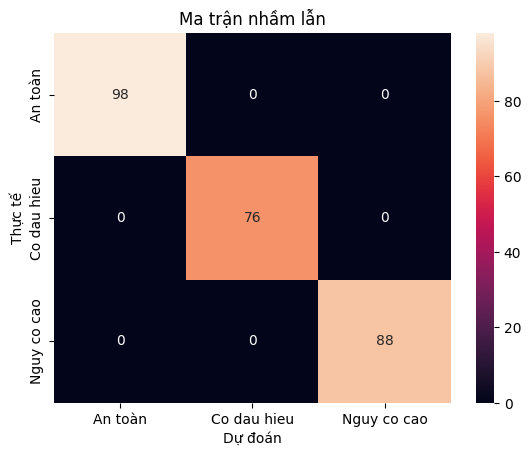

              precision    recall  f1-score   support

     An to√†n       1.00      1.00      1.00        98
 Co dau hieu       1.00      1.00      1.00        76
 Nguy co cao       1.00      1.00      1.00        88

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

# Ma tr·∫≠n nh·∫ßm l·∫´n
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("D·ª± ƒëo√°n")
plt.ylabel("Th·ª±c t·∫ø")
plt.title("Ma tr·∫≠n nh·∫ßm l·∫´n")
plt.show()

# B√°o c√°o chi ti·∫øt
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [15]:
# V√≠ d·ª• 1 m·∫´u ƒë·∫ßu v√†o
sample = pd.DataFrame([{
    "c'": 30,
    "L": 60,
    "gamma": 19.5,
    "h": 10.0,
    "u": 5.0,
    "phi'": 25,
    "beta": 30
}])

# Chu·∫©n h√≥a m·∫´u
sample_scaled = scaler.transform(sample)

# D·ª± ƒëo√°n
pred = model.predict(sample_scaled)
print("D·ª± ƒëo√°n m·ª©c ƒë·ªô s·∫°t l·ªü:", le.inverse_transform(pred)[0])


D·ª± ƒëo√°n m·ª©c ƒë·ªô s·∫°t l·ªü: Co dau hieu


In [16]:
import joblib

joblib.dump(model, "model_satlo.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

üéØ Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


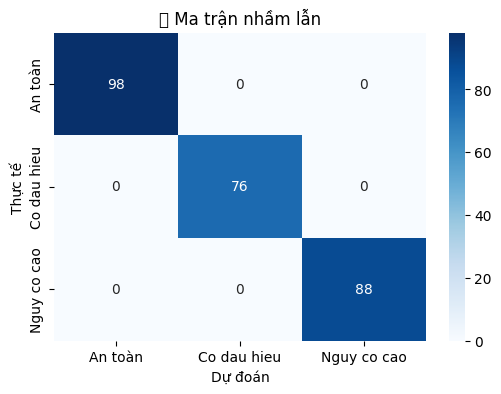

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


üßæ B√°o c√°o chi ti·∫øt:

              precision    recall  f1-score   support

     An to√†n       1.00      1.00      1.00        98
 Co dau hieu       1.00      1.00      1.00        76
 Nguy co cao       1.00      1.00      1.00        88

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262


üß™ D·ª± ƒëo√°n cho c√°c m·∫´u ki·ªÉm tra:
  üëâ M·∫´u 1: An to√†n
  üëâ M·∫´u 2: Co dau hieu
  üëâ M·∫´u 3: Nguy co cao


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.


üîÅ Cross-validation accuracy (5-fold): [0.99618321 1.         1.         0.99618321 1.        ]
üìä Mean accuracy: 0.9985


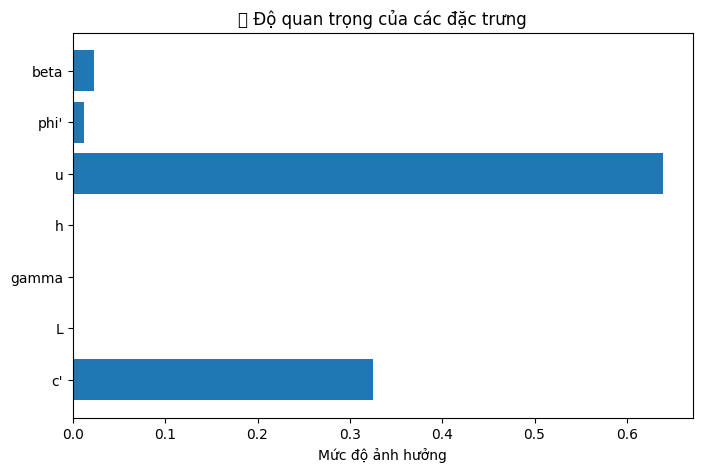

In [17]:
# ===== ƒê√ÅNH GI√Å 1: Accuracy =====
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("üéØ Accuracy:", round(accuracy, 4))

# ===== ƒê√ÅNH GI√Å 2: Ma tr·∫≠n nh·∫ßm l·∫´n =====
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("D·ª± ƒëo√°n")
plt.ylabel("Th·ª±c t·∫ø")
plt.title("üìä Ma tr·∫≠n nh·∫ßm l·∫´n")
plt.show()

# ===== ƒê√ÅNH GI√Å 3: Classification Report =====
from sklearn.metrics import classification_report

print("üßæ B√°o c√°o chi ti·∫øt:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ===== ƒê√ÅNH GI√Å 4: D·ª± ƒëo√°n th·ªß c√¥ng v·ªõi c√°c m·∫´u ƒë·∫°i di·ªán =====
test_cases = [
    {"c'": 70, "L": 30, "gamma": 18.5, "h": 5.0, "u": 0.5, "phi'": 36, "beta": 12},  # An to√†n
    {"c'": 35, "L": 60, "gamma": 19.5, "h": 12.0, "u": 6.0, "phi'": 25, "beta": 28}, # Co dau hieu
    {"c'": 10, "L": 90, "gamma": 22.0, "h": 20.0, "u": 30.0, "phi'": 15, "beta": 42}  # Nguy co cao
]

sample_df = pd.DataFrame(test_cases)
sample_scaled = scaler.transform(sample_df)
preds = model.predict(sample_scaled)

print("\nüß™ D·ª± ƒëo√°n cho c√°c m·∫´u ki·ªÉm tra:")
for i, pred in enumerate(preds):
    print(f"  üëâ M·∫´u {i+1}: {le.inverse_transform([pred])[0]}")

# ===== ƒê√ÅNH GI√Å 5: Cross-validation (5-Fold CV) =====
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='accuracy')
print("\nüîÅ Cross-validation accuracy (5-fold):", cv_scores)
print("üìä Mean accuracy:", round(cv_scores.mean(), 4))

# ===== ƒê√ÅNH GI√Å 6: Feature Importance =====
plt.figure(figsize=(8, 5))
plt.barh(X.columns, model.feature_importances_)
plt.title("üìå ƒê·ªô quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng")
plt.xlabel("M·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng")
plt.show()


In [18]:
from google.colab import files

# T·∫£i t·ª´ng file
files.download("model_satlo.pkl")
files.download("scaler.pkl")
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>